# Statistical Learning Theory
- Group: ALT
## Exercise 2: Variability of classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mean1 = np.array([0,1])
mean2 = np.array([1,0])

I = np.eye(2)
cov = 2*I

__Analytical formula for the weights after minimizing the squared error:__

$w^*$ = $(XX^{T})^{-1}$X$y_{True}^T$

In [3]:

def var_class(p,mean1,mean2,cov,n=50):
    #generate the training data
    r_train = np.zeros(n)
    r_test = np.zeros(n)
    w = np.zeros((n,3))
    
    for i in range(n):
        x1 = np.random.multivariate_normal(mean1, cov, size=int(p/2))
        x2 = np.random.multivariate_normal(mean2, cov, size=p-int(p/2))

        x_train = np.concatenate((x1,x2))

        y_train = np.ones(p)
        y_train[x1.shape[0]:] = -1
        X_train = np.vstack((np.ones(p),x_train.T))

        #training the model
        weights = np.dot(np.linalg.inv(np.dot(X_train,X_train.T)),np.dot(X_train,y_train))
        w[i] = weights
        #calculating the predictions
        y_pred_train = np.sign(np.dot(weights.T,X_train))

        #generating the data for the test set

        p_test = 1000

        x1_test = np.random.multivariate_normal(mean1, cov, size=int(p_test/2))
        x2_test = np.random.multivariate_normal(mean2, cov, size=p_test-int(p_test/2))

        x_test = np.concatenate((x1_test,x2_test))
        X_test = np.vstack((np.ones(p_test),x_test.T))

        y_test = np.ones(p_test)
        y_test[x1_test.shape[0]:] = -1

        #calculating the predictions for the test set
        y_pred_test = np.sign(np.dot(weights.T,X_test))

        #######################################
        #accuracies

        r_train[i] = np.sum(y_pred_train == y_train)/p
        r_test[i] = np.sum(y_pred_test == y_test)/p_test
    
    r_train_avg = np.mean(r_train)
    r_test_avg = np.mean(r_test)
    r_train_std = np.std(r_train)
    r_test_std = np.std(r_test)
    
    weight_mean = np.mean(w,axis=0)
    weight_sd = np.std(w,axis=0)
    
    
    return r_train_avg,r_train_std,r_test_avg,r_test_std,weight_mean,weight_sd


In [4]:
p = np.array([3,4,6,8,10,20,40,100])

mean_train = np.zeros(p.shape[0])
mean_test = np.zeros(p.shape[0])

std_train = np.zeros(p.shape[0])
std_test = np.zeros(p.shape[0])

weight_avg = np.zeros((p.shape[0],3))
weight_std = np.zeros((p.shape[0],3))


for i in range(len(p)):
    mean_train[i],std_train[i],mean_test[i],std_test[i],weight_avg[i],weight_std[i] = var_class(p[i],mean1,mean2,cov)
        

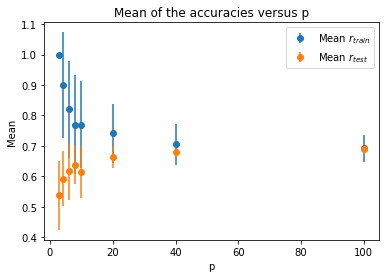

In [5]:
plt.errorbar(p,mean_train,label="Mean $r_{train}$",yerr=std_train,fmt='o')
plt.errorbar(p,mean_test,label="Mean $r_{test}$",yerr=std_test,fmt='o')
plt.xlabel("p")
plt.ylabel("Mean")
plt.title("Mean of the accuracies versus p")
plt.legend()
plt.show()

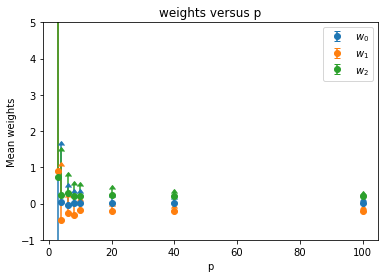

In [6]:
plt.errorbar(p,weight_avg.T[0],label="$w_{0}$",yerr=weight_std.T[0],lolims=True,fmt='o')
plt.errorbar(p,weight_avg.T[1],label="$w_{1}$",yerr=weight_std.T[1],lolims=True,fmt='o')
plt.errorbar(p,weight_avg.T[2],label="$w_{2}$",yerr=weight_std.T[2],lolims=True,fmt='o')
plt.ylim(-1,5)
plt.xlabel("p")
plt.ylabel("Mean weights")
plt.title("weights versus p")
plt.legend()
plt.show()

In [7]:
from math import comb
def binomial(n,p):
    k = np.array(range(n))
    pmf = np.zeros(n)
    for i in range(n):
        pmf[i] = comb(n,k[i])*(p**k[i])*(1-p)**(n-k[i])
    return pmf   

In [8]:

N = np.array([50,100])
P = np.array([0.1,0.5,0.7])


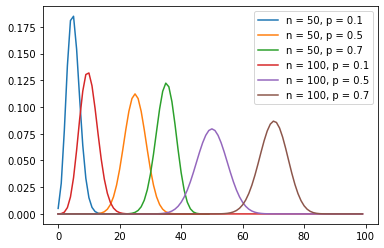

In [9]:
comb_array = np.array(np.meshgrid(N, P)).T.reshape(-1, 2) 
for nn,pp in comb_array:
    nn = int(nn)
    plt.plot(range(nn),binomial(nn,pp),label="n = {}, p = {}".format(nn,pp))
plt.legend()
plt.show()

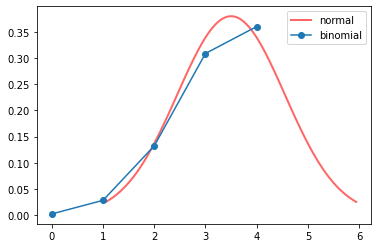

In [10]:
from scipy.stats import norm

N = np.array([5,100])
p = 0.7

x = np.linspace(norm.ppf(0.01,loc=5*p,scale=5*p*(1-p)),
                norm.ppf(0.99,loc=5*p,scale=5*p*(1-p)), 100)
plt.plot(x, norm.pdf(x,loc=5*p,scale=5*p*(1-p)),
       'r-', lw=2, alpha=0.6, label='normal')
plt.plot(range(5),binomial(5,p),'-o',label="binomial")
plt.legend()
plt.show()

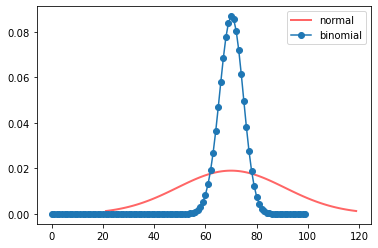

In [12]:
y = np.linspace(norm.ppf(0.01,loc=100*p,scale=100*p*(1-p)),
                norm.ppf(0.99,loc=100*p,scale=100*p*(1-p)), 100)
plt.plot(y, norm.pdf(y,loc=100*p,scale=100*p*(1-p)),
       'r-', lw=2, alpha=0.6, label='normal')
plt.plot(range(100),binomial(100,p),'-o',label="binomial")

plt.legend()
plt.show()